In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CCES16_Common_OUTPUT_Feb2018_VV.tab", sep="\t")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,370,371,373,374,375,376,377,378,379,380,381,382,383,385,386,388,389,390,391,393,394,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,419,420,422,423,424,425,426,427,430,432,436,439,441,443,445,446,447,448,449,450,451,452,453,454,455,456,458,460,462,486,487,493,494,513,515,520,522,526,527,528,533,534,535,541,542,543,544,545,559,560) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,V101,commonweight_vv,commonweight_vv_post,commonweight_vv_lgbt,commonweight,commonweight_post,tookpost,lookupzip,inputstate,cdid113,...,CL_E2016PPEP,CL_E2016PPVM,CL_E2016PEP,CL_E2016PVM,starttime_pre,endtime_pre,starttime_post,endtime_post,dma,dmaname
0,222168628,1.344214,1.042267,1.195346,0.944967,0.730450,1,3442,33,2,...,NaN,NaN,NaN,NaN,2016-10-20 05:05:44.887,2016-10-20 05:36:38.850,2016-11-16 06:24:32.895,2016-11-16 06:40:18.810,NaN,NaN
1,273691199,1.182352,1.280103,1.280565,0.767256,0.892838,1,70118,22,2,...,NaN,NaN,NaN,NaN,2016-10-23 14:54:58.548,2016-10-24 14:20:41.711,2016-11-30 14:02:55.143,2016-11-30 14:09:26.931,622.0,NEW ORLEANS
2,284214415,0.217396,NaN,0.248930,0.090604,0.000000,0,63851,29,8,...,NaN,NaN,NaN,NaN,2016-10-29 06:54:12.797,2016-10-29 07:24:44.759,NaN,NaN,632.0,PADUCAH-CAPE GIRARD-HARSBG
3,287557695,0.532320,NaN,0.928750,0.142583,0.000000,0,36703,1,7,...,NaN,NaN,NaN,NaN,2016-10-27 11:06:21.322,2016-10-27 11:26:00.051,NaN,NaN,698.0,MONTGOMERY-SELMA
4,290387662,1.261106,1.092519,1.161894,1.206498,1.019007,1,80526,8,2,...,NaN,NaN,NaN,NaN,2016-10-10 10:56:31.061,2016-10-10 11:14:12.215,2016-11-18 09:09:28.044,2016-11-18 09:21:05.905,751.0,DENVER


In [69]:
df = df[df['CC16_410a'].notna()] #Drop rows where presidental vote is 0
df = df.reset_index()

<BarContainer object of 4 artists>

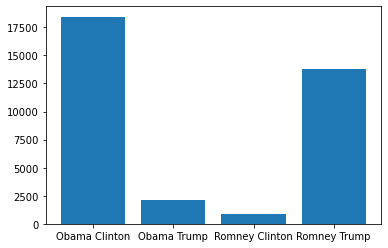

In [70]:
#Goal: Predict 2016 presidential vote (column 'CC16_410a')

#Visualize 2012 to 2016 vote patterns
DD = 0
DR = 0
RD = 0
RR = 0

for i in range(len(df)):
    if df.CC16_410a[i] == 1: #R 2016
        if df.CC16_326[i] == 1: #D 2012
            DR += 1
        elif df.CC16_326[i] == 2: #R 2012
            RR += 1
    if df.CC16_410a[i] == 2: #D 2016
        if df.CC16_326[i] == 1: #D 2012
            DD += 1
        elif df.CC16_326[i] == 2: #R 2012
            RD += 1
        
plt.bar(["Obama Clinton", "Obama Trump", "Romney Clinton", "Romney Trump"], [DD, DR, RD, RR])

In [66]:
# baseline prediction
basePred = []
for i in range(len(df)):
    # first predict based off of party identification
    if df.pid3[i] == 1:
        basePred.append(2)
    elif df.pid3[i] == 2:
        basePred.append(1)
        
    # then predict off of ideology
    elif df.ideo5[i] in {1, 2}:
        basePred.append(2)
    elif df.ideo5[i] in {4, 5}:
        basePred.append(1)
        
    # then predict off of 2012 vote
    elif df.CC16_326[i] == 1: 
        basePred.append(2)
    elif df.CC16_326[i] == 2:
        basePred.append(1)
    elif df.CC16_326[i] == 3:
        basePred.append(3)
    elif df.CC16_326[i] == 4:
        basePred.append(6)
    elif df.CC16_326[i] == 5:
        basePred.append(7)
        
    else:
        basePred.append(1)

In [71]:
corr = 0
numVoted = 0
for i in range(len(df)):
    voted = df.CC16_410a[i] in {1, 2, 3, 4, 5, 7, 8}
    if voted:
        numVoted += 1
        if basePred[i] == df.CC16_410a[i]:
            corr += 1;
        
acc = corr/numVoted
        
print("baseline accuracy: " + str(acc))

baseline accuracy: 0.8208700341542333
